# Test and visualize simple parser data

In [1]:
from keras_frcnn.simple_parser import get_data

In [2]:
def format_img_size(img, C):
	""" formats the image size based on config """
	img_min_side = float(C.im_size)
	(height,width,_) = img.shape
		
	if width <= height:
		ratio = img_min_side/width
		new_height = int(ratio * height)
		new_width = int(img_min_side)
	else:
		ratio = img_min_side/height
		new_width = int(ratio * width)
		new_height = int(img_min_side)
	img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
	return img, ratio	

def format_img_channels(img, C):
	""" formats the image channels based on config """
	img = img[:, :, (2, 1, 0)]
	img = img.astype(np.float32)
	img[:, :, 0] -= C.img_channel_mean[0]
	img[:, :, 1] -= C.img_channel_mean[1]
	img[:, :, 2] -= C.img_channel_mean[2]
	img /= C.img_scaling_factor
	img = np.transpose(img, (2, 0, 1))
	img = np.expand_dims(img, axis=0)
	return img

def format_img(img, C):
	""" formats an image for model prediction based on config """
	img, ratio = format_img_size(img, C)
	img = format_img_channels(img, C)
	return img, ratio


In [3]:
all_data, classes_count, class_mapping = get_data('data/Simple/elevator.txt')

Parsing annotation files


In [4]:
print(class_mapping)
print(classes_count)
print(all_data)

{'person': 0}
{'person': 113}
[{'width': 352, 'bboxes': [{'x1': 152, 'x2': 208, 'y1': 142, 'y2': 220, 'class': 'person'}], 'filepath': 'data/Simple/272.jpg', 'imageset': 'test', 'height': 288}, {'width': 352, 'bboxes': [{'x1': 139, 'x2': 239, 'y1': 169, 'y2': 230, 'class': 'person'}], 'filepath': 'data/Simple/269.jpg', 'imageset': 'trainval', 'height': 288}, {'width': 352, 'bboxes': [{'x1': 215, 'x2': 272, 'y1': 178, 'y2': 275, 'class': 'person'}], 'filepath': 'data/Simple/398.jpg', 'imageset': 'trainval', 'height': 288}, {'width': 352, 'bboxes': [{'x1': 259, 'x2': 305, 'y1': 128, 'y2': 232, 'class': 'person'}], 'filepath': 'data/Simple/250.jpg', 'imageset': 'trainval', 'height': 288}, {'width': 352, 'bboxes': [{'x1': 166, 'x2': 197, 'y1': 106, 'y2': 187, 'class': 'person'}], 'filepath': 'data/Simple/394.jpg', 'imageset': 'trainval', 'height': 288}, {'width': 352, 'bboxes': [{'x1': 178, 'x2': 211, 'y1': 139, 'y2': 200, 'class': 'person'}, {'x1': 290, 'x2': 317, 'y1': 115, 'y2': 185, 'c

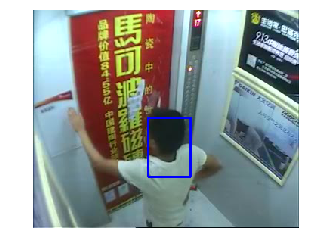

In [5]:
# http://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
img = cv2.imread(all_data[0]['filepath'])
for bbox in all_data[0]['bboxes']:
    img = cv2.rectangle(img, (bbox['x1'], bbox['y1']), (bbox['x2'], bbox['y2']), (255,0,0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#image = mpimg.imread(all_data[0]['filepath'])
#plt.imshow(image)
plt.axis('off')
plt.show()
# X, ratio = format_img(img, C)

In [13]:
#print(img)